Training (batched):   0%|          | 1/250 [00:00<02:47,  1.48it/s]

反馈激活 CA3 数量: 16.0, 反馈权重总和: 34841.0


Testing different mask ratios: 100%|██████████| 10/10 [01:13<00:00,  7.33s/it]


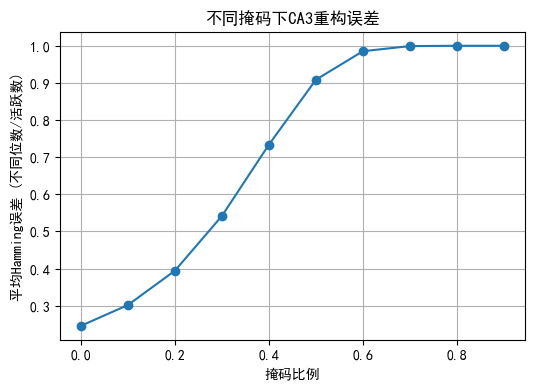

In [1]:
import torch
import matplotlib.pyplot as plt
from BTSP_feedback_network import BinaryBTSPfeedbackNetwork
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# ----------------- 创建网络 -----------------
net = BinaryBTSPfeedbackNetwork(
    n_input=10000,
    n_memory=15000,
    fq=0.0025,
    fp=0.005,
    fw=0.6,
    threshold=8,
    fb_threshold=20
)

# ----------------- 生成稀疏输入模式 -----------------
patterns = net.make_sparse_patterns(8000)  # 假设 net 已实现 make_sparse_patterns
net.train(patterns)
mask_ratios = np.linspace(0, 0.9, 10)  # 0%~90% 掩码
errors = net.test_reconstruction_under_mask(patterns, mask_ratios)

plt.figure(figsize=(6,4))
plt.plot(mask_ratios, errors, marker='o')
plt.xlabel("掩码比例")
plt.ylabel("平均Hamming误差 (不同位数/活跃数)")
plt.title("不同掩码下CA3重构误差")
plt.grid(True)
plt.show()


Memory count sweep:   0%|          | 0/12 [00:00<?, ?it/s]

反馈激活 CA3 数量: 60.0, 反馈权重总和: 35003.0


Memory count sweep:   8%|▊         | 1/12 [00:11<02:11, 11.98s/it]

反馈激活 CA3 数量: 47.0, 反馈权重总和: 36314.0


Memory count sweep:  17%|█▋        | 2/12 [00:35<03:09, 18.97s/it]

反馈激活 CA3 数量: 45.0, 反馈权重总和: 39685.0


Memory count sweep:  25%|██▌       | 3/12 [01:11<03:59, 26.60s/it]

反馈激活 CA3 数量: 53.0, 反馈权重总和: 37159.0


Memory count sweep:  33%|███▎      | 4/12 [01:59<04:39, 34.94s/it]

反馈激活 CA3 数量: 50.0, 反馈权重总和: 36432.0


Memory count sweep:  42%|████▏     | 5/12 [02:58<05:06, 43.85s/it]

反馈激活 CA3 数量: 52.0, 反馈权重总和: 36871.0


Memory count sweep:  50%|█████     | 6/12 [04:10<05:19, 53.25s/it]

反馈激活 CA3 数量: 49.0, 反馈权重总和: 36377.0


Memory count sweep:  58%|█████▊    | 7/12 [05:33<05:15, 63.09s/it]

反馈激活 CA3 数量: 44.0, 反馈权重总和: 36240.0


Memory count sweep:  67%|██████▋   | 8/12 [07:18<05:05, 76.32s/it]

反馈激活 CA3 数量: 41.0, 反馈权重总和: 39695.0


Memory count sweep:  75%|███████▌  | 9/12 [09:10<04:22, 87.50s/it]

反馈激活 CA3 数量: 38.0, 反馈权重总和: 35861.0


Memory count sweep:  83%|████████▎ | 10/12 [30:00<14:52, 446.34s/it]

反馈激活 CA3 数量: 47.0, 反馈权重总和: 35171.0


Memory count sweep:  92%|█████████▏| 11/12 [56:18<13:12, 792.84s/it]

反馈激活 CA3 数量: 25.0, 反馈权重总和: 37020.0


Memory count sweep: 100%|██████████| 12/12 [1:08:28<00:00, 342.40s/it]


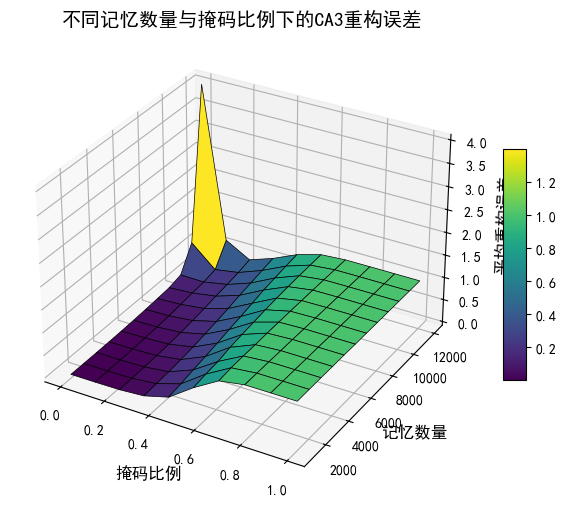

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from BTSP_feedback_network import BinaryBTSPfeedbackNetwork
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"



# ----------------- 参数设置 -----------------
n_input = 10000
n_memory = 15000
fq = 0.0025
fp = 0.005
fw = 0.6
threshold = 8

memory_nums =  np.arange(1000,13000,1000)  # 不同记忆数量
mask_ratios = np.linspace(0, 1, 10)         # 不同掩码比例

results = np.zeros((len(memory_nums), len(mask_ratios)))  # 保存误差

# ----------------- 主循环 -----------------
for i, n_patterns in enumerate(tqdm(memory_nums, desc="Memory count sweep")):
    # 根据记忆数量调整反馈阈值（经验规则，可调）
    fb_threshold = 8 + int(n_patterns / 1000 )

    # 创建网络
    net = BinaryBTSPfeedbackNetwork(
        n_input=n_input,
        n_memory=n_memory,
        fq=fq,
        fp=fp,
        fw=fw,
        threshold=threshold,
        fb_threshold=fb_threshold
    )

    # 生成稀疏输入模式
    patterns = net.make_sparse_patterns(n_patterns)

    # 训练网络
    net.train(patterns)

    # 测试不同掩码比例下的重构误差
    errors = net.test_reconstruction_under_mask(patterns, mask_ratios)

    # 保存结果
    results[i, :] = errors

# ----------------- 绘制 3D 图 -----------------
X, Y = np.meshgrid(mask_ratios, memory_nums)
Z = results

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', linewidth=0.5)
ax.set_xlabel('掩码比例', fontsize=12)
ax.set_ylabel('记忆数量', fontsize=12)
ax.set_zlabel('平均重构误差', fontsize=12)
ax.set_title('不同记忆数量与掩码比例下的CA3重构误差', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()
